# Business Analytics und Künstliche Intelligenz
Wintersemester 2023/2024

Prof. Dr. Jürgen Bock

## Übungen zu den Grundlagen künstlicher Neuronaler Netze in PyTorch

Dieses Notebook bietet Übungsaufgaben zum grundlegenden Umgang mit künstlichen Neuronalen Netzen in *PyTorch*. Die einzelnen Aufgaben sind in Markdown-Zellen beschrieben. Fügen Sie Ihre Lösung in die jeweils nachfolgende Code-Zelle ein und fügen Sie bei Bedarf gerne weitere Code-Zellen hinzu.

### Lernziele
* Sie sind in der Lage einfache künstliche Neuronen zu implementieren und die Einflüsse der einzelnen Komponenten zu untersuchen.
* Sie sind in der Lage strukturierte Datensätze zur Verwendung in *PyTorch* vorzubereiten und einfache mehrschichtige künstliche neuronale Netze zu strukturieren.
* Sie sind in der Lage eigene neuronale Netzstrukturen in einen generischen Lernalgorithmus einzuordnen und mit verschiedenen Datensätzen zu trainieren.
* Sie sind in der Lage den Einfluss verschiedener Hyperparameter auf den Lernprozess und Qualität des gelernten Modells bei künstlichen neuronalen Netzen zu untersuchen und zu diskutieren.

### Einfache Neuronen

Betrachten Sie die Bool'sche Funktion *NAND*.

Die Wahrheitstafel für NAND ist wie folgt:

| NAND | 0 | 1 |
|-----|---|---| 
| **0**   | 1 | 1 |
| **1**   | 1 | 0 |

Warum ist diese Funktion durch ein einzelnes Neuron berechenbar?

*Antwort:* Weil es linier seperierbar ist.

Überlegen Sie sich wie dieses eine Neuron konfiguriert sein müsste. (Eingänge, Gewichte)

*Antwort:* Eingänge: Bias, x1=a1, x2=a2 Gewicht: w01, w11, w21

Implementieren Sie die Berechnung in Python und testen Sie Ihre Lösung.

In [6]:
def threshold(x):
    if x >= 0:
        return 1
    else:
        return 0
x1 = 1
x2 = 1

w01, w11, w21 = 1.5,-1,-1    # NAND

y = threshold(w01 + w11*x1 + w21*x2)

print("{}, {} -> {}".format(x1, x2, y))

1, 1 -> 0


### Mehrschichtige neuronale Netze

#### Synthetische Daten

Betrachten Sie den folgenden (synthetischen) Datensatz mit zwei Merkmalen und zwei Klassen:

In [7]:
from sklearn import datasets

data = datasets.make_circles(
    n_samples = 10000,
    noise = 0.1,
    factor = 0.5 )

Machen Sie sich mit dem Datensatz vertraut indem Sie einen Scatter-Plot erstellen.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

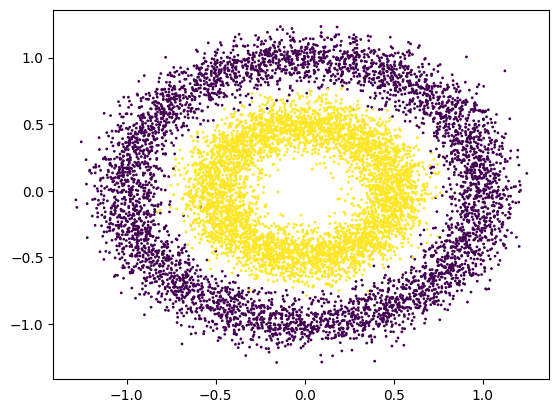

In [9]:
X, t = data
plt.scatter(X[:,0], X[:,1], c=t, s=1)
plt.show()

Definieren Sie ein mehrschichtiges neuronales Netz mittels *PyTorch*, und implementieren Sie eine Trainingsroutine.

Stellen Sie sicher, dass das Modul ``dataview`` im aktuellen Verzeichnis liegt (oder in ``sys.path``). Verwenden Sie die Funktion ``dataview.plot_decision_boundary2d(model, X, y)`` um die *decision boundary* darzustellen.

Experimentieren Sie mit den sogenannten *Hyperparametern*: Verändern Sie Anzahl und Breite der Layer, verändern Sie Anzahl der Epochen und die *batch size*. Konsultieren Sie die *PyTorch* API Dokumentation und experimentieren Sie mit verschiedenen Aktivierungsfunktionen und Optimierern.

**Beachten Sie:** Nach Veränderung des Modells muss die Objektinstanz des Modells neu instanziiert werden (z.B. ``model = Net()``). Außerdem muss der Optimierer und etwaige Hilfsvariablen, wie z.B. eine ``loss_history`` o.ä., neu initialisiert werden.

Welche Erkenntnisse haben Sie erlangt?

*Antwort:*

#### Reale Daten

Verwenden Sie ``scikit-learn`` um den *Breast Cancer Wisconsin* Datensatz zu laden. Siehe: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Machen Sie sich mit der Funktion ``train_test_split`` aus dem Modul ``sklearn.model_selection`` vertraut. Verwenden Sie diese Funktion um den Datensatz in eine Trainings- und eine Testmenge aufzuteilen.

Definieren Sie ein neuronales Netz und verwenden Sie den Trainingsdatensatz um es zu trainieren. Beachten Sie bei der neuronalen Netzstruktur die Größe des Eingabe- und Ausgabevektors.

Verwenden Sie ``scikit-learn`` um einen *classification report* zu erstellen, anhand dessen Sie ihr Modell bewerten können.

Berechnen Sie dazu zuerst den Ausgangsvektor ihres neuronalen Netzes für die Eingabevektoren des Testdatensatzes. 

**Hinweis:** ``torch.from_numpy`` erstellt einen Tensor aus einem *NumPy*-Array, in dem der Testdatensatz vorliegt. Zudem müssen Sie den Eingabevektor in einen ``FloatTensor`` konvertieren.

Für den *classification report* müssen Sie außerdem die Fließkommazahlen des Ausgangsvektors (resultierend aus der ``sigmoid`` Aktivierungsfunktion) in einen ganzzahlige Werte umwandeln.